# Regression in Python

A tutorial by Christoph Carl Kling, datascience ät c-kling.de

GESIS - Leibniz Institute for the Social Sciences

http://www.c-kling.de

This work is licensed under a Creative Commons Attribution 4.0 International License:
https://creativecommons.org/licenses/by/4.0/

## Preparation and Basics

Here we introduce concepts relevant for hypothesis testing, such as
* The normal distribution class in Python
* Maxmimum-Likelihood-Estimation
* Confidence intervals
* Sampling distributions

### Preparation

We start by telling Python to print plots in the notebook. 
Then we load the required libraries.
Additionally to the libraries for hypothesis testing, we load the sklearn library. This library is useful for machine learning tasks such as predicting variables with linear regression. We will later look at regression in detail.

In [1]:
#Plot directly in the notebook
%matplotlib inline
#Statistics library
from scipy import stats as stats
#Library for plotting
import matplotlib.pyplot as plt
#Basic library for data manipulation
import numpy as np
#Library for linear regression
import sklearn.linear_model as sk_lm
#Library for general data mining / machine learning
import sklearn as skl
#Basic library for loading and analysing data
import pandas as pd

### Standardisation

A normally distributed variable $x$ with mean $\mu$ and standard deviation $\sigma$ can be standardised with 

$z = {x- \mu \over \sigma}$

after which

$z \sim N(0,1)$, a normal distribution with mean $0$ and standard deviation $1$.


Example:

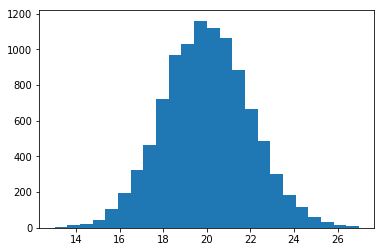

In [2]:
#We create an arbitrary normal distribution
mu = 20;
sigma = 2;
normal_dist = stats.norm(mu,sigma);

#We sample 10.000 values x from the normal distribution
values_x = normal_dist.rvs(size=10000);

#We create 100 bins for the histogram
bins = np.linspace(min(values_x), max(values_x), 25)

plt.hist(values_x, bins);

We move our sampled values and get new values which are distributed around $0$:

$x_{\text{new}} = x-\hat\mu$

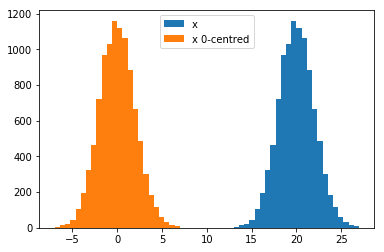

In [3]:
mu_hat = np.average(values_x);

values_x_new = np.subtract(values_x, mu_hat);

#Plot historgram of old values
plt.hist(values_x, bins);

#Plot histogram of new values
bins_new = np.linspace(min(values_x_new), max(values_x_new), 25)
plt.hist(values_x_new, bins_new);

plt.legend(["x", "x 0-centred"]);

We divide our new x by the estimated standard deviation and yield the standardised values:

$x_{\text{standardised}} = x_{\text{new}} / \hat\sigma$

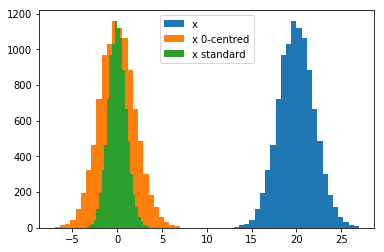

In [4]:
sigma_hat = np.std(values_x);

values_x_standard = np.divide(values_x_new, sigma_hat);

#Plot historgram of old values
plt.hist(values_x, bins);

#Plot histogram of new values
bins_new = np.linspace(min(values_x_new), max(values_x_new), 25)
plt.hist(values_x_new, bins_new);

#Plot histogram of standardised values
bins_new = np.linspace(min(values_x_standard), max(values_x_standard), 25)
plt.hist(values_x_standard, bins_new);

plt.legend(["x", "x 0-centred", "x standard"]);

$x_{\text{standardised}} = z \sim N(0,1)$

## Linear Regression:

Linear regression is a probabilistic model. A probabilistic model explains observed data.

In a linear regression, values are assumed to be normally distributed around a regression line.

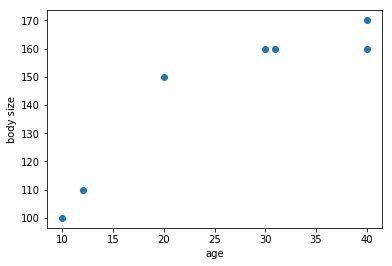

In [5]:
#read the dataset
df = pd.read_csv ("data/regression.csv", na_values="?")

plt.scatter(df["age"],df["body_size"]);
plt.xlabel("age");
plt.ylabel("body size");

### Linear regression in Scikit

The linear regression model fits a line between the datapoints. This line gives the expected y-value for a given x.

ScikitLearn provides the class
* *LinearRegression*
with the following methods and variables:
 * *fit(X,y)*: fits the regression on data X, y. X is an array of arrays (one for each datapoint), y is the observed y value of each datapoint.
**After fitting the regression, one can read the learned parameters and dp predictions:**
 * *intercept_*: Offset, prediction if all values are 0
 * *coef_*: Regression coefficients 
 * *predict(X)* Predict y values for input X
 

#### Input parameters X and y
First we create the input parameters X and y:

In [6]:
age = df["age"].values;

print("Variable age:",age);

#We transform the input to the right format
#Scikit expects an array of arrays -- every
#datapoint can have multiple x values (e.g. 
#age, weight, shoe size, ...)
X = [list(i) for i in zip(*[age])];

print("X:",X);

#For y, we directly can use the values
y = df["body_size"].values;
print("y:", y);

Variable age: [30 40 40 20 12 31 10]
X: [[30], [40], [40], [20], [12], [31], [10]]
y: [160 160 170 150 110 160 100]


#### Practical example

Now we instantiate the *LinearRegression* class and call the function *fit(X,y)* in order to estimate the linear regression parameters.

In [7]:
reg = sk_lm.LinearRegression();
reg.fit(X,y);

We can print the learned parameters:

In [8]:
intercept = reg.intercept_;
coefficients = reg.coef_;

print("beta0 =", intercept, ";", "[beta1] =", coefficients);

beta0 = 91.0347502327 ; [beta1] = [ 2.03692212]


#### Predicting new data points

Using the regression, we can predict new datapoints, which we can use to visualise the regression line.

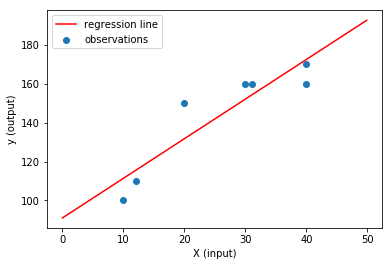

In [9]:
#Plot datapoints
plt.scatter(df["age"],df["body_size"]);

#Create n datapoints between start and end
#Since all the datapoints are on a line, 
#we could just plot the first and last point and connect them
#but I predict multiple points which also works for other models.
start = min(X)[0]-10;
end = max(X)[0]+10;
test_x = np.arange(start,end,0.1)[:];

#Bring the datapoints to the input format of the regression
test_x = [list(i) for i in zip(*[test_x])];

test_y=reg.predict(test_x);

plt.plot(test_x,test_y, color='red');

plt.legend(["regression line","observations"],loc=2);
plt.xlabel("X (input)");
plt.ylabel("y (output)");

## Scaling regression coefficients:

The coefficients of a regression change, if we move the input-variables along the x-axis or if we scale X / y.

**Example 1:** We measure the age in days: $x_{\text{age in days}} = x_{\text{age}} * 356$

Old regression parameters: beta0 = 91.0347502327 ; [beta1] = [ 2.03692212]
New regression parameters: beta0 = 91.0347502327 ; [beta1] = [ 0.00558061]


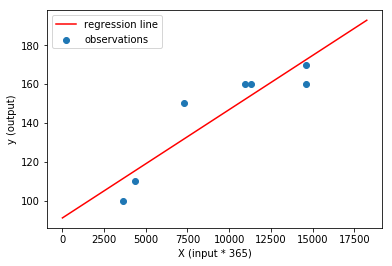

In [10]:
print("Old regression parameters: beta0 =", intercept, ";", "[beta1] =", coefficients);

#Use age in days instead of years
df["age_in_days"] = np.multiply(df["age"],365);

variables_2 = [df["age_in_days"]];
X_2 = [list(i) for i in zip(*variables_2)];

reg_2 = sk_lm.LinearRegression();
reg_2.fit(X_2,y);

intercept_2 = reg_2.intercept_;
coefficients_2 = reg_2.coef_;

print("New regression parameters: beta0 =", intercept_2, ";", "[beta1] =", coefficients_2);

#Plot datapoints
plt.scatter(X_2,df["body_size"]);

#Create n datapoints between start and end
#Since all the datapoints are on a line, 
#we could just plot the first and last point and connect them
#but I predict multiple points which also works for other models.
start_2 = min(X_2)[0]-10*365;
end_2 = max(X_2)[0]+10*365;
test_x_2 = np.arange(start_2,end_2,0.1)[:];

#Bring the datapoints to the input format of the regression
test_x_2=test_x_2.reshape(-1,1)

#Predict and plot regression
test_y_2=reg_2.predict(test_x_2);

plt.plot(test_x_2,test_y_2, color='red');

plt.legend(["regression line","observations"],loc=2);
plt.xlabel("X (input * 365)");
plt.ylabel("y (output)");

**Example 2:** We measure the body size in m: $y_{\text{body size cm}} = y_{\text{body size}} / 100$

Old regression parameters: beta0 = 91.0347502327 ; [beta1] = [ 2.03692212]
New regression parameters: beta0 = 0.910347502327 ; [beta1] = [ 0.02036922]


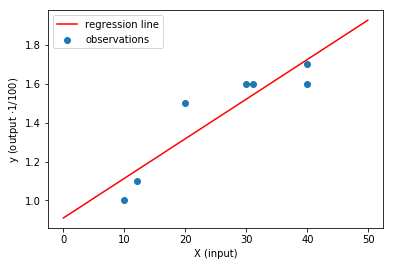

In [11]:
#Use body size in m instead of cm
df["body_size_m"] = np.divide(df["body_size"],100);

y_3 = df["body_size_m"];

reg_3 = sk_lm.LinearRegression();
reg_3.fit(X,y_3);

intercept_3 = reg_3.intercept_;
coefficients_3 = reg_3.coef_;

print("Old regression parameters: beta0 =", intercept, ";", "[beta1] =", coefficients);
print("New regression parameters: beta0 =", intercept_3, ";", "[beta1] =", coefficients_3);

#Plot datapoints
plt.scatter(df["age"],y_3);

#Predict and plot regression
test_y_3=reg_3.predict(test_x);

plt.plot(test_x,test_y_3, color='red');

plt.legend(["regression line","observations"],loc=2);
plt.xlabel("X (input)");
plt.ylabel("y (output $\cdot 1/100$)");

**Example 3:**We give the age in 10 years instead of the current age: $x_{\text{age in 10 years}} = x_{\text{age}} + 10$

Old regression parameters: beta0 = 91.0347502327 ; [beta1] = [ 2.03692212]
New regression parameters: beta0 = 70.6655290102 ; [beta1] = [ 2.03692212]


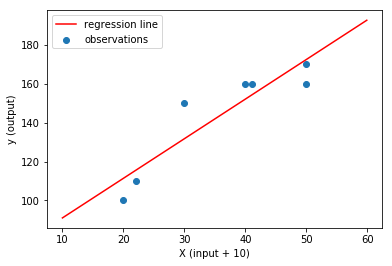

In [12]:
#Shift age by 10 years
df["age_in_10_years"] = np.add(df["age"],10);

variables_4 = [df["age_in_10_years"]];
X_4 = [list(i) for i in zip(*variables_4)];

reg_4 = sk_lm.LinearRegression();
reg_4.fit(X_4,y);

intercept_4 = reg_4.intercept_;
coefficients_4 = reg_4.coef_;

print("Old regression parameters: beta0 =", intercept, ";", "[beta1] =", coefficients);
print("New regression parameters: beta0 =", intercept_4, ";", "[beta1] =", coefficients_4);

#Plot datapoints
plt.scatter(X_4,df["body_size"]);

#Create n datapoints between start and end
#Since all the datapoints are on a line, 
#we could just plot the first and last point and connect them
#but I predict multiple points which also works for other models.
start_4 = min(X_4)[0]-10;
end_4 = max(X_4)[0]+10;
test_x_4 = np.arange(start_4,end_4,0.1)[:];

#Bring the datapoints to the input format of the regression
test_x_4=test_x_4.reshape(-1,1)

#Predict and plot regression
test_y_4=reg_4.predict(test_x_4);

plt.plot(test_x_4,test_y_4, color='red');

plt.legend(["regression line","observations"],loc=2);
plt.xlabel("X (input + 10)");
plt.ylabel("y (output)");

## Standardised coefficients:

Depending on how we scale or move $X$ and $y$, we get different regression parameters. In order to get coefficients which can be compared between different models, the input parameters can be *standardised*.

Standardisation means that we make our variables standard-normal – we subtract the mean and divide by the standard deviation:

$x_{\text{new}} = {x- \hat\mu \over \hat\sigma}$.

ScikitLearn provides a *preprocessing* class which comes with the function
* scale() 

which standardises the input variables.

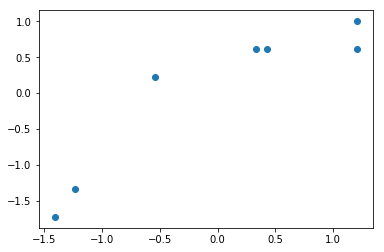

In [13]:
#First, we convert our input variables to floating point numbers
#X has to become a numpy array first.
X = np.array(X);
X = X.astype(np.float)
y = y.astype(np.float)

#Normalise x and y
std_X = skl.preprocessing.scale(X);
std_y = skl.preprocessing.scale(y);

plt.scatter(std_X,std_y);

Old regression parameters: beta0 = 91.0347502327 ; [beta1] = [ 2.03692212]
New regression parameters: beta0 = 1.6676751161e-16 ; [beta1] = [ 0.91420709]


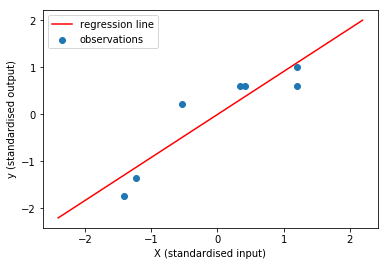

In [14]:
reg_std = sk_lm.LinearRegression();
reg_std.fit(std_X,std_y);

intercept_std = reg_std.intercept_;
coefficients_std = reg_std.coef_;

print("Old regression parameters: beta0 =", intercept, ";", "[beta1] =", coefficients);
print("New regression parameters: beta0 =", intercept_std, ";", "[beta1] =", coefficients_std);

#Plot datapoints
plt.scatter(std_X,std_y);

#Create n datapoints between start and end
#Since all the datapoints are on a line, 
#we could just plot the first and last point and connect them
#but I predict multiple points which also works for other models.
start_std = min(std_X)[0]-1;
end_std = max(std_X)[0]+1;
test_x_std = np.arange(start_std,end_std,0.1)[:];

#Bring the datapoints to the input format of the regression
test_x_std=test_x_std.reshape(-1,1)

#Predict and plot regression
test_y_std=reg_std.predict(test_x_std);

plt.plot(test_x_std,test_y_std, color='red');

plt.legend(["regression line","observations"],loc=2);
plt.xlabel("X (standardised input)");
plt.ylabel("y (standardised output)");

## Parameter significance:

The estimates for the regression coefficients are not precise. First, we standardise our regression coefficients. Then we can calculate a t-statistic for each estimated regression coefficient $\hat\beta_i$:

$t_i = \hat\beta_i \cdot \sqrt{(n-k-1)} \bigg/ \sqrt{\text{sqerr} \cdot \text{sqx}^{-1}_{i,i}} $

with

$\text{sqerr} =\sum_{i=1}^n \left( y_i - \hat y_i \right)^2$ being the squared prediction error and

$\text{sqx}^{-1} = (X'X)^{-1}$.

The t statistic follows a t-distribution with parameter $\text{df} = (n-k-1)$ degrees of freedom.

where $n$ is the number of observations and $k$ is the number of input variables.

In [15]:
def squared_error (regression, X, y):
    sqe = 0;
    for i in range(0,len(X)):
        y_hat = regression.predict([X[i]]);
        sq_error = (y[i]-y_hat)**2;
        sqe = sqe + sq_error;    
    return sqe;

#prints names and column contents for a table
def print_table (names,columns):
    df = pd.DataFrame();
    for i in range(0,len(names)):
        df[names[i]]=columns[i];
    print(df.to_string(index=False))

def significance_reg(reg,X,y):

    n = len(y);
    k = len(X[0])
    X = np.array(X);    
    sq_err = squared_error(reg,X,y);  
    
    #degrees of freedom for t-statistics
    df = n-k-1;   
    
    sq_err_by_sqx = sq_err * (np.linalg.inv(np.dot(X.T,X)).diagonal());
    t_bi = reg.coef_ * np.sqrt((n-k-1) /  sq_err_by_sqx );     
    
    #two-sided test
    p_values_bi = (1 - stats.t.cdf(abs(t_bi),df))*2;
    
    #here we print the statistics
    
    #first we define the shown coefficient names
    coef_names = [];
    for i in range(0,k):
        coef_names.append("beta %i"%(i+1));
    
    #now we give the rest of the values to be displayed
    table_values = [coef_names,reg.coef_,p_values_bi,t_bi]
    
    #print table using the function defined before
    print_table(["coefficient","value","p-value", "t-statistic"],table_values);

significance_reg(reg_std,std_X,std_y);

coefficient     value   p-value  t-statistic
    beta 1  0.914207  0.003952     5.044399


## Problems:

### Overfitting

Learning a model based on all parameters makes our model very complex. At some point, the complexity is not justified by data anymore. This means, the model fits better and better for the training data if we use more parameters, but for new data we will be worse and worse. This phenomenon is called *overfitting*.

### Forward selection
A popular algorithm which reduces the number of input parameters to prevent overfitting is called *forward selection*:
* We order input variables by their ability to predict the target variable $y$. 
* Then we check if each variable is improving a parameter called *Mallows CP*. 
* Mallows CP calculates how well our regression is predicting datapoints, but punishes for the number of input parameters. 
* If Mallows CP is not improving for additional variables, we stop and return the input matrix.

In [16]:
def mse (regression, X, y):
    mean_sq_err = squared_error(regression, X, y) / len(X);
    return mean_sq_err;

def mcp (mse, regression, X, y):
    P = len(X[0]);
    N = len(X);
    sq_err = squared_error(regression,X, y);
    mcp = (sq_err / mse) - N + 2*P;
    return mcp[0];

#returns the indices of the variables of X which we keep according to forward selection
def forward_selection(X,y):
    reg = sk_lm.LinearRegression();
    reg.fit(X,y);
    #The mean squared error of the full model is an estimator of the
    #variance of the full model
    mse_full = mse(reg,X,y);
    print("\nMean squared error full model:", mse_full,"\n");

    mcps = [];
    X = np.array(X);
    
    #number of input variables
    num_variables = len(X[0]);
    
    #We keep track of the indices of X which we did not use yet for our regression model
    #In the beginning, this is a list of all indices of X, and we remove the indices
    #by iteratively selecting the X_i which reduces the squared error most
    remaining_indices = list(range(0,num_variables));
    #At the same time, we keep track of the order of the indices of the best X_i
    #(which reduced the squared error most)
    max_indices = [];
    
    print("Starting foward selection...");
    
    for j in range(0, num_variables):
        min_error = 0;
        max_index = 0;
        max_mcp = 0;
        #we iterate through the remaining indices
        for k in range(0, len(remaining_indices)):
            i = remaining_indices[k];
            #clone max_indices before adding i
            test_max_indices = list(max_indices);
            #now add the current index to use it for regression
            test_max_indices.append(i);
            #we now have an array with the indices we want to use for the regression
            #and make it a numpy array, which allows us to select these columns from X
            test_indices = np.array(test_max_indices);
            #Now we select the columns with the test_indices from X
            test_X = X[:, test_indices];
            #we train the regression
            test_reg = sk_lm.LinearRegression();
            test_reg.fit(test_X,y);
            #We calculate the squared error and Mallows CP
            test_se = squared_error(test_reg, test_X, y);
            test_mcp = mcp(mse_full, test_reg, test_X, y);       
            #The first index is the best seen so far (since it's the first)
            #or the index which has a lower error than min_error
            if (k == 0 | (test_se < min_error)):
                min_error = test_se;
                max_index = i;
                max_mcp = test_mcp;
        #now we found the index which minimised the error
        #we add it to the list of best indices
        max_indices.append(max_index);
        #we remove it from the remaining indices
        remaining_indices.remove(max_index);
        #we add the calculated Mallow CP of this model
        mcps.append(max_mcp);
        print("best indices at iteration ", (j+1), ":", max_indices);

    print("...done.\n")
    #We now have a list of Mallows CP for each step
    print("Mallow's CPs of best indices:", mcps);

    #we find the index of the model with the minimum Mallows CP
    miniumum_mcp_index = np.array(mcps).argmin();

    #we use all indices till the one with the minimum Mallows CP
    used_X = max_indices[0:miniumum_mcp_index+1];

        #We now have a list of the respective best indices of each step
    print("X column indices found by forward selection:", used_X,"\n");
    
    #now we know which X we keep
    optimal_X = X[:, used_X];
    
    #we return the optimal variable indices
    return used_X;

#### Example forward selection

We use not only the age, but also the gender information. Forward selection helps to decide, if the gender (0 or 1) is really improving our prediction, or if leads to overfitting for the given data.

In [17]:
# Add gender to our input variables
variables = [df["age"],df["gender"]];

#We transform the input to the right format
X_all = [list(i) for i in zip(*variables)];

print("X:",X_all);
#now we can find the best X for our regression
#according to forward selection
fs_indices = forward_selection(X_all,y);

print("The new X is:");
print(np.array(X_all)[:,fs_indices]);

X: [[30, 0], [40, 0], [40, 0], [20, 0], [12, 1], [31, 1], [10, 1]]

Mean squared error full model: [ 89.9798546] 

Starting foward selection...
best indices at iteration  1 : [0]
best indices at iteration  2 : [0, 1]
...done.

Mallow's CPs of best indices: [3.3434747828586051, 4.0000000000000009]
X column indices found by forward selection: [0] 

The new X is:
[[30]
 [40]
 [40]
 [20]
 [12]
 [31]
 [10]]


#### Effect of forward selection
Forward selection will make our regression fit worse on our training data, but better on test data. We can show this looking at the prediction errow:

In [18]:
reg = sk_lm.LinearRegression();
reg.fit(np.array(X_all),y);

reg_fs = sk_lm.LinearRegression();
reg_fs.fit(np.array(X_all)[:,fs_indices],y);

# The mean squared errors
print("Mean squared error on training data, full input variables: ", mse(reg,X_all,y));
print("Mean squared error on training data, selected input variables: ", mse(reg_fs,np.array(X_all)[:,fs_indices],y));

Mean squared error on training data, full input variables:  [ 89.9798546]
Mean squared error on training data, selected input variables:  [ 107.24923541]


The positive effect on predicting test data will be demonstrated in the following on a larger dataset, where we split our data in training and test data.

## The housing dataset:

The housing dataset contains features and selling prices of 28 houses. The data consists of:
* the local selling prices, in hundreds of dollars;
* the number of bathrooms;
* the area of the site in thousands of square feet;
* the size of the living space in thousands of square feet;
* the number of garages;
* the number of rooms;
* the number of bedrooms;
* the age in years;
* construction type (type 1 to type 4)
* architecture type (type 1 to type 3)
* the information if the house has a fire place
* selling price 

We load the data in a DataFrame:

In [19]:
df_house_orig = pd.DataFrame();
df_house_orig = df_house_orig.from_csv("data/houses.csv");

n = len(df_house_orig);

#print fist rows
print(df_house_orig.head().to_string(index=False));

bathrooms   area  living_space  garages  rooms  bedrooms  age  construction_type  architecture_type  fire_place  price
                                                                                                                      
      1.0  3.472         0.998      1.0      7         4   42                  3                  1           0   25.9
      1.0  3.531         1.500      2.0      7         4   62                  1                  1           0   29.5
      1.0  2.275         1.175      1.0      6         3   40                  2                  1           0   27.9
      1.0  4.050         1.232      1.0      6         3   54                  4                  1           0   25.9
      1.0  4.455         1.121      1.0      6         3   42                  3                  1           0   29.9


#### Categorical variables

A linear regression can have binary input variables. Categorical variables have to be binarised. We tell the *DataFrame* that the categorical variables are strings (i.e. no numbers) and then use the 
* *get_dummies()*
function of pandas to convert any categorical variable to binary values. 

In [20]:
# Tell that architecture_type and construction_type are strings
df_house_orig["architecture_type"]= df_house_orig["architecture_type"].astype(str);
df_house_orig["construction_type"]= df_house_orig["construction_type"].astype(str);

# Binarise all string variables with the get_dummies function
# We drop the first dummy, i.e. if everything is 0 we know that
# the class is the first class.
df_house = pd.get_dummies(df_house_orig, drop_first=True);

#print fist rows
print(df_house.head().to_string(index=False));

bathrooms   area  living_space  garages  rooms  bedrooms  age  fire_place  price  construction_type_2  construction_type_3  construction_type_4  architecture_type_2  architecture_type_3
                                                                                                                                                                                         
      1.0  3.472         0.998      1.0      7         4   42           0   25.9                    0                    1                    0                    0                    0
      1.0  3.531         1.500      2.0      7         4   62           0   29.5                    0                    0                    0                    0                    0
      1.0  2.275         1.175      1.0      6         3   40           0   27.9                    1                    0                    0                    0                    0
      1.0  4.050         1.232      1.0      6         3   54         

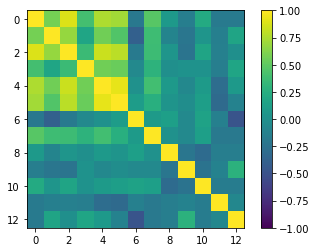

                     bathrooms      area  living_space   garages     rooms  \
bathrooms             1.000000  0.583495      0.894029  0.399777  0.757478   
area                  0.583495  1.000000      0.680651  0.175567  0.564698   
living_space          0.894029  0.680651      1.000000  0.363548  0.840513   
garages               0.399777  0.175567      0.363548  1.000000  0.566325   
rooms                 0.757478  0.564698      0.840513  0.566325  1.000000   
bedrooms              0.726375  0.459350      0.791281  0.539703  0.924445   
age                  -0.200938 -0.382963     -0.177487 -0.057658  0.011342   
fire_place            0.481197  0.376435      0.371852  0.291581  0.396835   
construction_type_2   0.083098 -0.095315      0.040437 -0.004845  0.071172   
construction_type_3  -0.141732 -0.218501     -0.232922  0.022724 -0.064198   
construction_type_4   0.225494  0.046477      0.164547  0.016069  0.090789   
architecture_type_2  -0.180540 -0.140040     -0.127950 -0.146662

In [21]:
X_house = df_house.drop("price", axis=1);
y_house = df_house["price"];

corr_matrix=X_house.corr();
plt.imshow(corr_matrix,interpolation='none',clim=(-1, 1));
plt.colorbar();
plt.show();

print(corr_matrix)

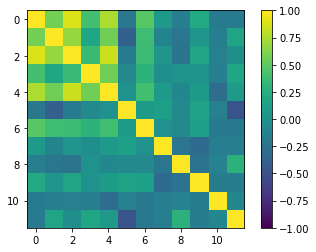

In [22]:
#remove all but one column from sets of strongly correlated columns
X_house_reg = X_house.drop("bedrooms", axis=1);

#new correlation matrix
corr_matrix_2=X_house_reg.corr();
plt.imshow(corr_matrix_2,interpolation='none',clim=(-1, 1));
plt.colorbar();
plt.show();

In [40]:
# Split the data into training/testing sets
test_size = 10;

X_house_reg_train = X_house_reg.values[:-test_size];
X_house_reg_test = X_house_reg.values[-test_size:];

# Split the targets into training/testing sets
y_house_train = y_house.values[:-test_size];
y_house_test = y_house.values[-test_size:];

# Create linear regression object
reg_house = sk_lm.LinearRegression()

# Train the model using the training sets
reg_house.fit(X_house_reg_train, y_house_train);

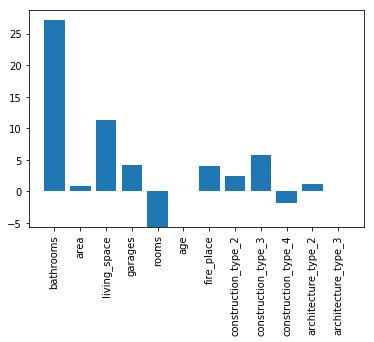

Mean squared error:  [ 65.19481876]


In [41]:
# Get column names as list
column_names = list(X_house_reg.columns.values);
x_pos = range(2,len(column_names)+2)

# Print bars
plt.bar(x_pos,reg_house.coef_, align='center');
plt.xticks(x_pos,column_names,rotation='vertical');
plt.show();

# The mean squared error
print("Mean squared error: ", mse(reg_house,X_house_reg_test,y_house_test));

In [25]:
#We do forward selection of the dataframe values
house_idcs = forward_selection(X_house_reg_train,y_house_train);


Mean squared error full model: [  3.47098798e-29] 

Starting foward selection...
best indices at iteration  1 : [1]
best indices at iteration  2 : [1, 2]
best indices at iteration  3 : [1, 2, 3]
best indices at iteration  4 : [1, 2, 3, 4]
best indices at iteration  5 : [1, 2, 3, 4, 5]
best indices at iteration  6 : [1, 2, 3, 4, 5, 6]
best indices at iteration  7 : [1, 2, 3, 4, 5, 6, 7]
best indices at iteration  8 : [1, 2, 3, 4, 5, 6, 7, 8]
best indices at iteration  9 : [1, 2, 3, 4, 5, 6, 7, 8, 0]
best indices at iteration  10 : [1, 2, 3, 4, 5, 6, 7, 8, 0, 10]
best indices at iteration  11 : [1, 2, 3, 4, 5, 6, 7, 8, 0, 10, 11]
best indices at iteration  12 : [1, 2, 3, 4, 5, 6, 7, 8, 0, 10, 11, 9]
...done.

Mallow's CPs of best indices: [6.3832053871044483e+29, 6.3546795962238005e+29, 4.3553075601859717e+29, 3.9156961859157058e+29, 3.4207723678954564e+29, 1.092463301482855e+29, 28.181818181818183, 14.545454545454547, 11.454545454545455, 13.454545454545455, 15.454545454545455, 20.72727

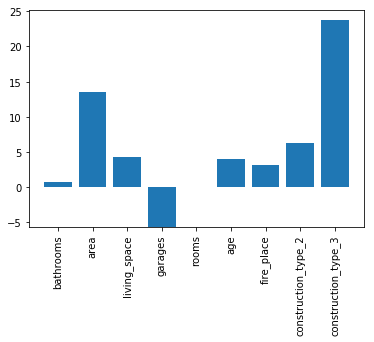

(Mean squared error before forward selection:  [ 65.19481876] )
Mean squared error after forward selection:  [ 51.28529803]
(Mean squared error on train data before forward selection:  [ 2.37762696] )
Mean squared error on train data after forward selection:  [ 2.75031394]


In [42]:
# Create linear regression object
reg_house_fs = sk_lm.LinearRegression()

X_house_subset = X_house_reg_train[:,house_idcs];

# Train the model using the selected subset of the training sets
reg_house_fs.fit(X_house_subset, y_house_train);

# Get column names as list, get selected indices
column_names_fs = list(X_house_reg.columns.values[house_idcs]);
x_pos = range(1,len(column_names_fs)+1)

# Print bars
plt.bar(x_pos,reg_house_fs.coef_, align='center');
plt.xticks(x_pos,column_names,rotation='vertical');
plt.show();

# The mean squared error
print("(Mean squared error before forward selection: ", mse(reg_house,X_house_reg_test,y_house_test),")");
print("Mean squared error after forward selection: ", mse(reg_house_fs,X_house_reg_test[:,house_idcs],y_house_test));

# The mean squared error
print("(Mean squared error on train data before forward selection: ", mse(reg_house,X_house_reg_train,y_house_train),")");
print("Mean squared error on train data after forward selection: ", mse(reg_house_fs,X_house_reg_train[:,house_idcs],y_house_train));

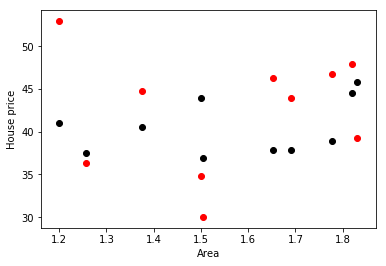

In [43]:
# Plot predictions for the area
plt.scatter(X_house_reg_test[:,house_idcs][:,1], y_house_test,  color='black')
plt.scatter(X_house_reg_test[:,house_idcs][:,1], reg_house_fs.predict(X_house_reg_test[:,house_idcs]), color='red');
plt.xlabel("Area");
plt.ylabel("House price");
plt.show();

# Interpreting a linear regression

We standardise all parameters and fit the regression. Then we calculate the p-values for the regression coefficients.

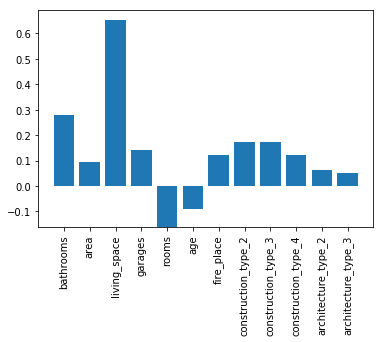

coefficient     value   p-value  t-statistic
    beta 1  0.278750  0.111662     1.690181
    beta 2  0.094143  0.260035     1.170565
    beta 3  0.652200  0.001751     3.797890
    beta 4  0.142435  0.048403     2.148598
    beta 5 -0.162083  0.211475    -1.305250
    beta 6 -0.089680  0.277495    -1.126888
    beta 7  0.122987  0.060537     2.029503
    beta 8  0.172120  0.011285     2.887153
    beta 9  0.170917  0.017478     2.670000
   beta 10  0.122469  0.065275     1.988874
   beta 11  0.063153  0.272889     1.138205
   beta 12  0.051779  0.524557     0.651538


In [28]:
# Standardise the input and output values
X_house_std = skl.preprocessing.scale(X_house_reg);
y_house_std = skl.preprocessing.scale(y_house);

# Train the regression
std_reg = skl.linear_model.LinearRegression();
std_reg.fit(X_house_std,y_house_std);

# Get column names as list
column_names = list(X_house_reg.columns.values);
x_pos = range(2,len(column_names)+2)

# Print bars
plt.bar(x_pos,std_reg.coef_, align='center');
plt.xticks(x_pos,column_names,rotation='vertical');
plt.show();

# Print significance test
significance_reg(std_reg,X_house_std,y_house_std);

#### Significance
Our significance level is $\alpha = 0.05$. Bonferroni correction gives a corrected significance level of $\alpha_{\text{corrected}} = 0,004$.

## Logistic Regression:

If we want to predict if a house has a fire place, we have to adapt our model.
The predicted data now is not continuous, but binary. Assumptions behind the linear regression (linear relation input output, normally distributed prediction error) are no violated.
We have to adapt our model!

First, we construct the input matrix X and the predicted variable y. As before, we drop the strongly correlated *bedroom* variable.

In [29]:
X_house_log = df_house.drop(["fire_place"],axis=1).drop("bedrooms", axis=1);
y_house_log = df_house["fire_place"];

Now we plot one of the input variables (we choose area, as it has a nice variance) against the output variable y.

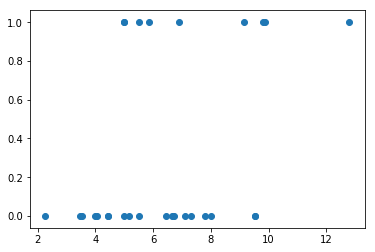

In [30]:
plt.scatter(X_house_log["area"],y_house_log);

#### Logistic regression in ScikitLearn
The logistic regression model fits a logistic function between the datapoints. 
This function gives the probability of y being true for a given input x.

ScikitLearn provides the class
* *LogisticRegression*
with functions
 * *fit(X,y)*: fits the regression on data X, y. X is an array of arrays (one for each datapoint), y is the observed y value of each datapoint.
**After fitting the regression, one can read the learned parameters:**
 * *intercept_*: Offset, prediction if all values are 0
 * *coef_*: Regression coefficients 

Let's initialise the class and fit the parameters:

In [31]:
logreg = skl.linear_model.LogisticRegression();
logreg.fit(X_house_log,y_house_log);

Now we can visualise our predictions for a given input x. Our input has many variables (which we can't plot), so we just show the area on the x-axis. Because the model takes the other variables in account as well, the predictions will be complex (and not on a simple function).

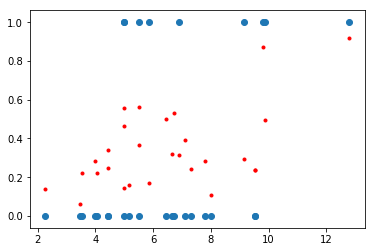

In [32]:
plt.scatter(X_house_log["area"],y_house_log);

#resolution
test_x = np.arange(min(X_house_log["area"]),max(X_house_log["area"]),1000)[:];
test_y=logreg.predict_proba(X_house_log)[:,1];
plt.plot(X_house_log["area"],test_y, ".",color='red');

#### Simple logistic regresison

A more intuitive way to show how logistic regression works is to show the output for a single input variable.

In [33]:
#instantiate new class
logreg_simple = skl.linear_model.LogisticRegression();

#Place X_house_log["area"] in an array an "zip" it.
X_house_log_area = [X_house_log["area"]];
X_house_log_area_zip = [list(i) for i in zip(*X_house_log_area)];

#fit the regression
logreg_simple.fit(X_house_log_area_zip,y_house_log);

We now can plot the predicted probability for y being one. From close this can look like a line:

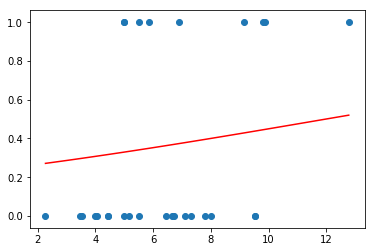

In [34]:
plt.scatter(X_house_log["area"],y_house_log);
test_x_2 = np.arange(min(X_house_log_area_zip)[0],max(X_house_log_area_zip)[0],0.1);
test_x_2_zip = [list(i) for i in zip(*[test_x_2])];
test_y_2=logreg_simple.predict_proba(test_x_2_zip)[:,1];

plt.plot(test_x_2,test_y_2, color='red');

If we now zoom out and show the output of the regression function, we see the nice shape of the logistic function. (It can look like this or inverted, depending on if the probability grows or decreases for growing x).

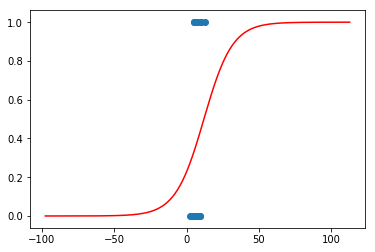

In [35]:
plt.scatter(X_house_log["area"],y_house_log);
test_x_3 = np.arange(min(X_house_log_area_zip)[0]-100,max(X_house_log_area_zip)[0]+100,0.1);
test_x_3_zip = [list(i) for i in zip(*[test_x_3])];
test_y_3=logreg_simple.predict_proba(test_x_3_zip)[:,1];

plt.plot(test_x_3,test_y_3, color='red');

### Interpreting logistic regression parameters

First we standardise the input and output variables $X$:

In [36]:
X_house_log_std = skl.preprocessing.scale(X_house_log);

#### Significance test for logistic regression parameters

For the parameters of a logistic regression, we calclulate the Wald statistic:
$W=\frac{\hat\beta}{X^{T}VX} \sim \chi^2_1$

where $\chi^2_1$ is the chi-square distribution with one degree of freedom. It looks as follows:

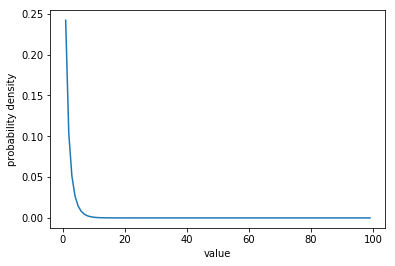

In [37]:
x2_x = np.arange(0,100);

#Instantiate the chi2 class from stats library
chi2_1 = stats.chi2(1);

#Calculate probability densities
x2_y = chi2_1.pdf(x2_x);

plt.plot(x2_x,x2_y);
plt.xlabel("value");
plt.ylabel("probability density");
plt.show();

We define a function which prints the test statistics and p-values:
* *significance_logreg(reg,X,y)*

In [38]:
def significance_logreg(reg,X,y):

    n = len(y);
    X = np.array(X);  
    k=len(X[0]);
    
    #predicted probabilities
    predProbs = np.matrix(reg.predict_proba(X))

    # Design matrix -- add column of 1's at the beginning of your X_train matrix
    X_ones = np.hstack(((np.ones(shape = (n,1))), X_house_log));

    # diagonal matrix with p * (1-p)
    V = np.matrix(np.zeros(shape = (n, n)));
    np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

    # Covariance matrix
    covLogit = np.linalg.inv(X_ones.T * V * X_ones);

    # Wald statistic (coefficient / s.e.) ^ 2
    logitParams = np.insert(reg.coef_, 0, reg.intercept_)
    wald_statistics = (logitParams / np.sqrt(np.diag(covLogit))) ** 2;
    
    # Probability of W under chi square distribution
    p_values_bi = (1.0 - stats.chi2(1).cdf(abs(wald_statistics)));
    
    #here we print the statistics
    
    #first we define the shown coefficient names
    coef_names = [];
    for i in range(0,k):
        coef_names.append("beta %i"%(i+1));
                    
    #now we give the rest of the values to be displayed
    table_values = [coef_names,reg.coef_[0],p_values_bi[-k:],wald_statistics[-k:]]
    
    #print table using the function defined before
    print_table(["coefficient","value","p-value", "W-statistic"],table_values);

We plot the coefficients and show the significances for analysis:

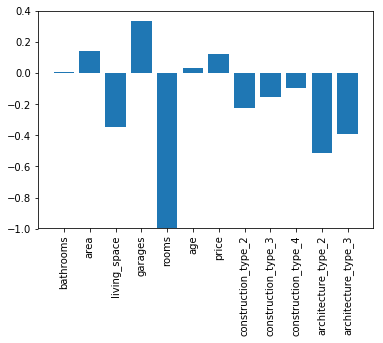

coefficient     value   p-value  W-statistic
    beta 1  0.010185  0.997849     0.000007
    beta 2  0.141168  0.661704     0.191460
    beta 3 -0.348318  0.922752     0.009403
    beta 4  0.334790  0.747343     0.103777
    beta 5 -0.996935  0.377000     0.780461
    beta 6  0.034100  0.519147     0.415588
    beta 7  0.123050  0.399734     0.709126
    beta 8 -0.224330  0.881945     0.022053
    beta 9 -0.151683  0.938345     0.005983
   beta 10 -0.098291  0.944381     0.004867
   beta 11 -0.512334  0.803356     0.062004
   beta 12 -0.392035  0.896425     0.016946


In [39]:
# Get column names as list
column_names_log = list(X_house_log.columns.values);
x_pos_log = range(2,len(column_names_log)+2);


# Print bars
plt.bar(x_pos_log,logreg.coef_[0], align='center');
plt.xticks(x_pos_log,column_names_log,rotation='vertical');
plt.show();

significance_logreg(logreg,X_house_log,y_house_log);